In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(8693, 14)
(4277, 13)
(4277, 2)


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train_not_na = train.dropna()

In [10]:
train_not_na

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
train_not_na['Transported'].replace({False : 0 , True : 1},inplace = True)

C:\Users\MGaming\AppData\Local\Temp\ipykernel_7520\1532741703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_not_na['Transported'].replace({False : 0 , True : 1},inplace = True)


In [12]:
train_not_na['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

In [13]:
target = train_not_na['Transported']
train_not_na.drop(['Transported'],axis =1 , inplace = True)

C:\Users\MGaming\AppData\Local\Temp\ipykernel_7520\506414862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_not_na.drop(['Transported'],axis =1 , inplace = True)


In [14]:
target

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

In [15]:
total = train_not_na.append(test)
total

C:\Users\MGaming\AppData\Local\Temp\ipykernel_7520\2336024365.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = train_not_na.append(test)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [16]:
total.shape

(10883, 13)

In [17]:
total.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,10792.000000,10801.000000,10777.000000,10785.000000,10782.000000,10803.000000
mean,28.802539,221.544764,463.680894,177.945387,309.246151,306.472369
std,14.396816,630.484127,1621.887223,570.343750,1133.658617,1175.106100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,51.000000,81.000000,31.000000,59.000000,44.000000
max,79.000000,11567.000000,29813.000000,12253.000000,22408.000000,22272.000000


In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [19]:
imp = IterativeImputer(random_state=42)
date = pd.Timestamp('2200-01-01')

In [20]:
for col in total:
    if total[col].dtype=="object":
        total[col].fillna("not listed", inplace=True)
    if total[col].dtype=="int":
        total[col].fillna(total[col].mean(), inplace=True)
    if total[col].dtype=='float':
       total[col] = imp.fit_transform(total[col].values.reshape(-1,1))
    if total[col].dtype=="datetime64[ns]":
        total[col].fillna(date, inplace=True)

In [21]:
total

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,not listed,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.802539,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,not listed,28.802539,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


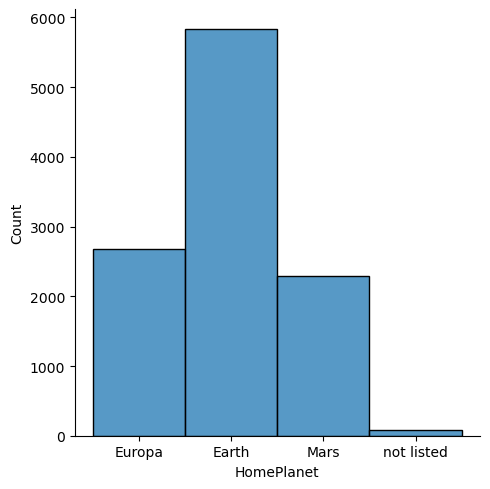

In [22]:
sns.displot(total['HomePlanet'])

In [23]:
home_count =  total['HomePlanet'].value_counts()
home_count

Earth         5829
Europa        2675
Mars          2292
not listed      87
Name: HomePlanet, dtype: int64

In [24]:
total['HomePlanet'].replace({"Earth":1 , "Europa": 2 , "Mars": 3 , "not lisated":4},inplace = True)
total["HomePlanet"]

0       2
1       1
2       2
3       2
4       1
       ..
4272    1
4273    1
4274    3
4275    2
4276    1
Name: HomePlanet, Length: 10883, dtype: object

In [25]:
total['CryoSleep'][total['CryoSleep'] == 'not listed'] = False

C:\Users\MGaming\AppData\Local\Temp\ipykernel_7520\3160388580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['CryoSleep'][total['CryoSleep'] == 'not listed'] = False


In [26]:
sleep_count = total['CryoSleep'].value_counts()
sleep_count

False    7007
True     3876
Name: CryoSleep, dtype: int64

In [27]:
dest_count = total['Destination'].value_counts()
dest_percent = dest_count/len(total)
dest_percent

TRAPPIST-1e      0.692089
55 Cancri e      0.206561
PSO J318.5-22    0.092897
not listed       0.008454
Name: Destination, dtype: float64

In [28]:
total['Destination'].replace({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3, "not listed": 4},inplace=True)
total['Destination']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    2
4275    4
4276    3
Name: Destination, Length: 10883, dtype: int64

In [29]:
total['Age_group'] = pd.cut(x=total['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
total['Age_group']

0       young adult
1       young adult
2        middle age
3       young adult
4             child
           ...     
4272    young adult
4273     middle age
4274    young adult
4275    young adult
4276     middle age
Name: Age_group, Length: 10883, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

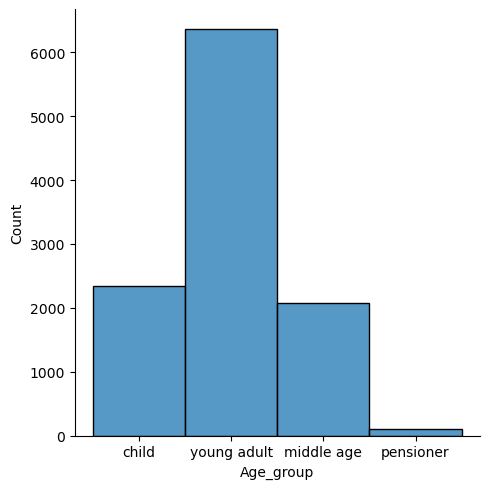

In [30]:
sns.displot(total['Age_group'])

In [31]:
#нормальное распределение?)

In [32]:
age_count = total['Age_group'].value_counts()
age_count

young adult    6359
child          2340
middle age     2074
pensioner       110
Name: Age_group, dtype: int64

In [33]:
total['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
total['Age_group']

0       1
1       1
2       3
3       1
4       2
       ..
4272    1
4273    3
4274    1
4275    1
4276    3
Name: Age_group, Length: 10883, dtype: category
Categories (4, int64): [2 < 1 < 3 < 4]

In [34]:
total['Age_group'] = total['Age_group'].astype(int)
total['VIP'][total['VIP'] == 'not listed'] = False
total['VIP'].replace({False: 0, True: 1})

C:\Users\MGaming\AppData\Local\Temp\ipykernel_7520\1199606896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['VIP'][total['VIP'] == 'not listed'] = False


0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

In [35]:
vip_count = total['VIP'].value_counts()
vip_count

False    10647
True       236
Name: VIP, dtype: int64

In [36]:
rm_service_high = total['RoomService'].max()
print(rm_service_high)

11567.0


In [37]:
total['Room_Service_group'] = pd.cut(x=total['RoomService'], bins=[-1, 2000, 8000, 12000], labels=['low', 'med', 'high'])
total['Room_Service_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Room_Service_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [38]:
rm_service_count = total['Room_Service_group'].value_counts()
rm_service_count

low     10624
med       253
high        6
Name: Room_Service_group, dtype: int64

In [39]:
total['Room_Service_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
total['Room_Service_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Room_Service_group, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [40]:
total['Food_Court_group'] = pd.cut(x=total['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels=['low', 'med', 'high'])
total['Food_Court_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Food_Court_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [41]:
fd_court_count = total['Food_Court_group'].value_counts()
fd_court_count

low     10640
med       235
high        8
Name: Food_Court_group, dtype: int64

In [42]:
total['Food_Court_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
total['Food_Court_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Food_Court_group, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [43]:
total['Shopping_group'] = pd.cut(x=total['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels=['low', 'med', 'high'])
total['Shopping_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Shopping_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [44]:
shopping_count = total['Shopping_group'].value_counts()
shopping_count

low     10709
med       166
high        8
Name: Shopping_group, dtype: int64

In [45]:
total['Shopping_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
total['Shopping_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Shopping_group, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [46]:
total['Spa_group'] = pd.cut(x=total['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
total['Spa_group']

0       low
1       low
2       med
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Spa_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [47]:
spa_count = total['Spa_group'].value_counts()
spa_count

low     10762
med       112
high        9
Name: Spa_group, dtype: int64

In [48]:
total['Spa_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
total['Spa_group']

0       1
1       1
2       2
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Spa_group, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [49]:
total['VR_group'] = pd.cut(x=total['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
total['VR_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: VR_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

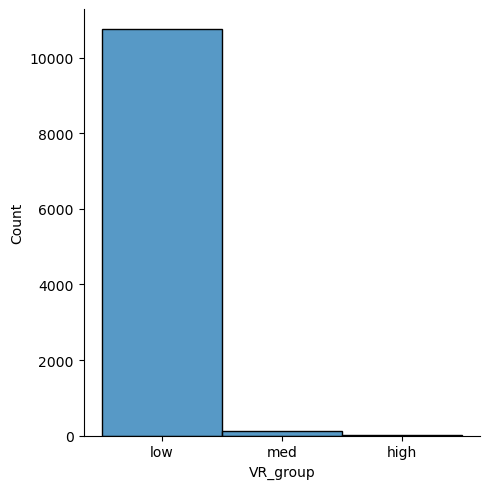

In [50]:
sns.displot(total['VR_group'])

In [51]:
vr_count = total['VR_group'].value_counts()
vr_percent = vr_count / len(total)
vr_percent

low     0.987412
med     0.011670
high    0.000919
Name: VR_group, dtype: float64

In [52]:
total['VR_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
total['VR_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: VR_group, Length: 10883, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [53]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         10883 non-null  object  
 1   HomePlanet          10883 non-null  object  
 2   CryoSleep           10883 non-null  object  
 3   Cabin               10883 non-null  object  
 4   Destination         10883 non-null  int64   
 5   Age                 10883 non-null  float64 
 6   VIP                 10883 non-null  object  
 7   RoomService         10883 non-null  float64 
 8   FoodCourt           10883 non-null  float64 
 9   ShoppingMall        10883 non-null  float64 
 10  Spa                 10883 non-null  float64 
 11  VRDeck              10883 non-null  float64 
 12  Name                10883 non-null  object  
 13  Age_group           10883 non-null  int32   
 14  Room_Service_group  10883 non-null  category
 15  Food_Court_group    10883 non-null  c

In [54]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age_group", "Room_Service_group", "Food_Court_group", "Shopping_group", "Spa_group", "VR_group"]

y = target
X = total[features][: len(train_not_na)]
X_test = total[features][len(train_not_na) :]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((5945, 9), (661, 9), (5945,), (661,), (4277, 9))

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)

In [59]:
print(model.score(X_train, y_train))

0.7391084945332212


In [60]:
import pickle

In [61]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [63]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [65]:
y_pred = model.predict(X_val)

In [66]:
print(model.score(X_val, y_val))

0.7443267776096822
